In [59]:
import pymongo
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
# import numpy as np

#### A) Create collections “flights” inside database “airline_delayDB”

In [2]:
client = pymongo.MongoClient("localhost:27017")
print(client)

db = client['airline_delayDB']
collection = db['flights']



MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)


#### B) How would you insert this entire dataset into a MongoDB collection named flights? Describe the structure of each document.

In [39]:
flight_df = pd.read_csv("Flights_Delay.csv")


flight_df.fillna(0, inplace=True)
flight_df

,ID,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,0,2015,3,4,3,EV,5170,N842AS,CVG,XNA,...,1103.0,33.0,0,0,0,14.0,0.0,19.0,0.0,0.0
1,1,2015,2,2,1,MQ,3584,N646MQ,DFW,SPS,...,1402.0,32.0,0,0,0,0.0,0.0,32.0,0.0,0.0
2,2,2015,1,27,2,B6,716,N309JB,JAX,DCA,...,1655.0,96.0,0,0,0,6.0,0.0,90.0,0.0,0.0
3,3,2015,1,28,3,EV,4289,N14162,COS,IAH,...,1742.0,-19.0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,4,2015,2,5,4,EV,5584,N851AS,ATL,AVL,...,1352.0,9.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55995,55995,2015,2,4,3,B6,1567,N508JB,HPN,PBI,...,1338.0,174.0,0,0,0,10.0,0.0,164.0,0.0,0.0
55996,55996,2015,1,17,6,AA,1113,N4YBAA,PIT,DFW,...,1055.0,-30.0,0,0,0,0.0,0.0,0.0,0.0,0.0
55997,55997,2015,1,17,6,US,661,N534UW,LAX,PHL,...,1424.0,-3.0,0,0,0,0.0,0.0,0.0,0.0,0.0
55998,55998,2015,1,13,2,DL,1318,N348NB,ATL,CLT,...,1116.0,-3.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [7]:
flight_df = pd.read_csv("Flights_Delay.csv")
flight_df.fillna(0, inplace=True)

data = flight_df.to_dict(orient = 'records')
collection.insert_many(data)

InsertManyResult([ObjectId('66d579fc237adbb9b3ce6e6b'), ObjectId('66d579fc237adbb9b3ce6e6c'), ObjectId('66d579fc237adbb9b3ce6e6d'), ObjectId('66d579fc237adbb9b3ce6e6e'), ObjectId('66d579fc237adbb9b3ce6e6f'), ObjectId('66d579fc237adbb9b3ce6e70'), ObjectId('66d579fc237adbb9b3ce6e71'), ObjectId('66d579fc237adbb9b3ce6e72'), ObjectId('66d579fc237adbb9b3ce6e73'), ObjectId('66d579fc237adbb9b3ce6e74'), ObjectId('66d579fc237adbb9b3ce6e75'), ObjectId('66d579fc237adbb9b3ce6e76'), ObjectId('66d579fc237adbb9b3ce6e77'), ObjectId('66d579fc237adbb9b3ce6e78'), ObjectId('66d579fc237adbb9b3ce6e79'), ObjectId('66d579fc237adbb9b3ce6e7a'), ObjectId('66d579fc237adbb9b3ce6e7b'), ObjectId('66d579fc237adbb9b3ce6e7c'), ObjectId('66d579fc237adbb9b3ce6e7d'), ObjectId('66d579fc237adbb9b3ce6e7e'), ObjectId('66d579fc237adbb9b3ce6e7f'), ObjectId('66d579fc237adbb9b3ce6e80'), ObjectId('66d579fc237adbb9b3ce6e81'), ObjectId('66d579fc237adbb9b3ce6e82'), ObjectId('66d579fc237adbb9b3ce6e83'), ObjectId('66d579fc237adbb9b3ce6e

#### C) Write a MongoDB command to insert a single flight record from the dataset.

In [18]:
collection.insert_one({'ID': 0,
 'YEAR': 2015,
 'MONTH': 3,
 'DAY': 4,
 'DAY_OF_WEEK': 3,
 'AIRLINE': 'EV',
 'FLIGHT_NUMBER': 5170,
 'TAIL_NUMBER': 'N842AS',
 'ORIGIN_AIRPORT': 'CVG',
 'DESTINATION_AIRPORT': 'XNA',
 'SCHEDULED_DEPARTURE': 935,
 'DEPARTURE_TIME': 954.0,
 'DEPARTURE_DELAY': 19.0,
 'TAXI_OUT': 16.0,
 'WHEELS_OFF': 1010.0,
 'SCHEDULED_TIME': 115,
 'ELAPSED_TIME': 129.0,
 'AIR_TIME': 108.0,
 'DISTANCE': 562,
 'WHEELS_ON': 1058.0,
 'TAXI_IN': 5.0,
 'SCHEDULED_ARRIVAL': 1030,
 'ARRIVAL_TIME': 1103.0,
 'ARRIVAL_DELAY': 33.0,
 'DIVERTED': 0,
 'CANCELLED': 0,
 'CANCELLATION_REASON': "NaN",
 'AIR_SYSTEM_DELAY': 14.0,
 'SECURITY_DELAY': 0.0,
 'AIRLINE_DELAY': 19.0,
 'LATE_AIRCRAFT_DELAY': 0.0,
 'WEATHER_DELAY': 0.0})

InsertOneResult(ObjectId('66d0abb56a28cc1b93b9e6d5'), acknowledged=True)

#### D. Write a MongoDB query to find all flights that were delayed by more than 60 minutes.

In [79]:
d = collection.find({
  "$or": [
    { "DEPARTURE_DELAY": { "$gt": 60 } },
    { "ARRIVAL_DELAY": { "$gt": 60 } }
  ]
}, {
    "_id":0,
  "AIRLINE": 1,
  "FLIGHT_NUMBER": 1,
  "ORIGIN_AIRPORT": 1,
  "DESTINATION_AIRPORT": 1,
  "DEPARTURE_DELAY": 1,
  "ARRIVAL_DELAY": 1
}).sort({ "DEPARTURE_DELAY": -1 }).limit(10)

for i in d:
    print(i)


{'AIRLINE': 'AA', 'FLIGHT_NUMBER': 5, 'ORIGIN_AIRPORT': 'DFW', 'DESTINATION_AIRPORT': 'HNL', 'DEPARTURE_DELAY': 1264.0, 'ARRIVAL_DELAY': 1295.0}
{'AIRLINE': 'AA', 'FLIGHT_NUMBER': 1080, 'ORIGIN_AIRPORT': 'ORD', 'DESTINATION_AIRPORT': 'EGE', 'DEPARTURE_DELAY': 1221.0, 'ARRIVAL_DELAY': 1235.0}
{'AIRLINE': 'AA', 'FLIGHT_NUMBER': 1240, 'ORIGIN_AIRPORT': 'SJC', 'DESTINATION_AIRPORT': 'DFW', 'DEPARTURE_DELAY': 1210.0, 'ARRIVAL_DELAY': 1235.0}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 2096, 'ORIGIN_AIRPORT': 'LGA', 'DESTINATION_AIRPORT': 'MSP', 'DEPARTURE_DELAY': 1166.0, 'ARRIVAL_DELAY': 1170.0}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 2048, 'ORIGIN_AIRPORT': 'PDX', 'DESTINATION_AIRPORT': 'JFK', 'DEPARTURE_DELAY': 1058.0, 'ARRIVAL_DELAY': 1038.0}
{'AIRLINE': 'DL', 'FLIGHT_NUMBER': 2185, 'ORIGIN_AIRPORT': 'FLL', 'DESTINATION_AIRPORT': 'JFK', 'DEPARTURE_DELAY': 929.0, 'ARRIVAL_DELAY': 915.0}
{'AIRLINE': 'MQ', 'FLIGHT_NUMBER': 3079, 'ORIGIN_AIRPORT': 'JLN', 'DESTINATION_AIRPORT': 'DFW', 'DEPARTURE_DELAY': 89

### E. How would you query all flights that were cancelled (CANCELLED flag set to 1) and return only the AIRLINE, ORIGIN_AIRPORT, and CANCELLATION_REASON fields?


In [45]:
list(collection.find(
  { "CANCELLED": 1 },
  { 
    "AIRLINE": 1, 
    "ORIGIN_AIRPORT": 1, 
    "CANCELLATION_REASON": 1,
    "_id": 0 
  }
)
    )

[{'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'MLI', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'BWI', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'DL', 'ORIGIN_AIRPORT': 'SFO', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'DFW', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'AA', 'ORIGIN_AIRPORT': 'BDL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'MKE', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'DCA', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'WN', 'ORIGIN_AIRPORT': 'FLL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'ORF', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'US', 'ORIGIN_AIRPORT': 'PHL', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'MQ', 'ORIGIN_AIRPORT': 'SHV', 'CANCELLATION_REASON': 'B'},
 {'AIRLINE': 'UA', 'ORIGIN_AIRPORT': 'LGA', 'CANCELLATION_REASON': 'C'},
 {'AIRLINE': 'EV', 'ORIGIN_AIRPORT': 'DFW', 'CANCEL

#### F. Using MongoDB’s aggregation framework, how would you calculate the average arrival delay (ARRIVAL_DELAY) for each airline? [Create a suitable plot using matplotlib/seaborn]



In [97]:
avgArrivalDelay = list(db.flights.aggregate([
  { "$match": {"ARRIVAL_DELAY": {"$gte":0}}},
   { "$group": {
      "_id": "$AIRLINE",
      "averageDelay": { "$avg": "$ARRIVAL_DELAY" }
    }
  },
  {
    "$sort": { "averageDelay": -1 }
  }
]))

avgArrivalDelay

[{'_id': 'F9', 'averageDelay': 44.792338709677416},
 {'_id': 'NK', 'averageDelay': 36.552158273381295},
 {'_id': 'B6', 'averageDelay': 36.476934523809526},
 {'_id': 'MQ', 'averageDelay': 33.204247627654766},
 {'_id': 'OO', 'averageDelay': 33.171880750828116},
 {'_id': 'DL', 'averageDelay': 32.2126011967617},
 {'_id': 'AA', 'averageDelay': 31.089486356340288},
 {'_id': 'EV', 'averageDelay': 30.734527687296417},
 {'_id': 'VX', 'averageDelay': 30.65432098765432},
 {'_id': 'UA', 'averageDelay': 30.498839907192576},
 {'_id': 'US', 'averageDelay': 25.308396124865446},
 {'_id': 'WN', 'averageDelay': 24.026439482961223},
 {'_id': 'AS', 'averageDelay': 22.613138686131386},
 {'_id': 'HA', 'averageDelay': 14.615176151761517}]

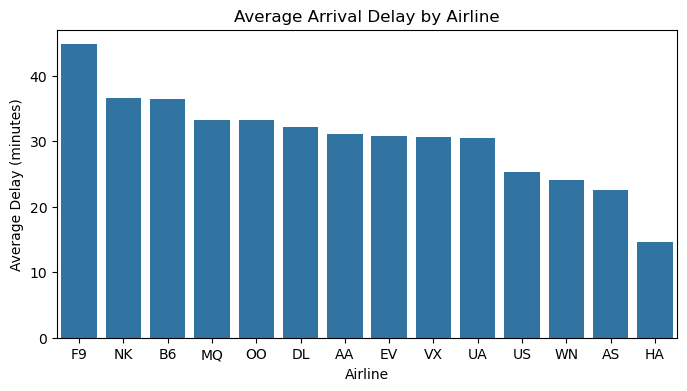

In [101]:
df = pd.DataFrame(avgArrivalDelay)
df.columns = ['Airline', 'AverageDelay']

# Sorting
df = df.sort_values('AverageDelay', ascending=False)

# plotting
plt.figure(figsize=(8, 4))
sns.barplot(x='Airline', y='AverageDelay', data=df)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.show()

#### G. Days of months with respect to average of arrival delays. [Create a suitable plot using matplotlib/seaborn]


In [118]:
result= list(db.flights.aggregate([
    { "$match":{"ARRIVAL_DELAY":{"$gte":0}}},{
        "$group": {
            "_id": "$DAY",
            "averageDelay": { "$avg": "$ARRIVAL_DELAY" }
        }
    },
    {
        "$sort": { "_id": 1 }
    }
]))

result

[{'_id': 1, 'averageDelay': 33.53963170536429},
 {'_id': 2, 'averageDelay': 31.003824091778203},
 {'_id': 3, 'averageDelay': 37.37388926862611},
 {'_id': 4, 'averageDelay': 37.35629921259842},
 {'_id': 5, 'averageDelay': 34.407728181212526},
 {'_id': 6, 'averageDelay': 35.87947882736157},
 {'_id': 7, 'averageDelay': 28.038857142857143},
 {'_id': 8, 'averageDelay': 31.206686930091184},
 {'_id': 9, 'averageDelay': 26.942549371633753},
 {'_id': 10, 'averageDelay': 22.240853658536587},
 {'_id': 11, 'averageDelay': 30.018779342723004},
 {'_id': 12, 'averageDelay': 33.553066037735846},
 {'_id': 13, 'averageDelay': 26.25169147496617},
 {'_id': 14, 'averageDelay': 23.42419080068143},
 {'_id': 15, 'averageDelay': 22.24576271186441},
 {'_id': 16, 'averageDelay': 29.23726851851852},
 {'_id': 17, 'averageDelay': 32.59104046242775},
 {'_id': 18, 'averageDelay': 24.846264367816094},
 {'_id': 19, 'averageDelay': 22.814528593508502},
 {'_id': 20, 'averageDelay': 27.38978102189781},
 {'_id': 21, 'avera

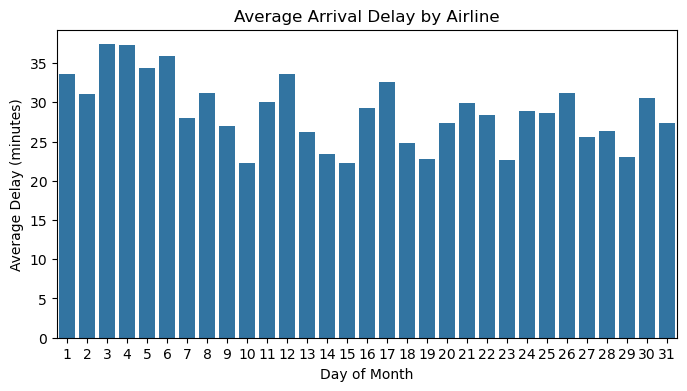

In [120]:
df = pd.DataFrame(result)
df.columns = ['Day of Month', 'AverageDelay']

# Sort DataFrame by average delay
df = df.sort_values('AverageDelay', ascending=False)

# bar plot using seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Day of Month', y='AverageDelay', data=df)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Day of Month')
plt.ylabel('Average Delay (minutes)')
plt.show()

#### H. Write a MongoDB aggregation pipeline to find the top 10 airports with the highest average total delay (DEPARTURE_DELAY + ARRIVAL DELAY).

In [132]:
result = list(collection.aggregate([
    {  "$match":{"ARRIVAL_DELAY":{"$gte":0},"DEPARTURE_DELAY":{"$gte":0}}},{
        "$addFields": {
            "TOTAL_DELAY": { "$add": ["$DEPARTURE_DELAY", "$ARRIVAL_DELAY"] }
        }
    },
    {
        "$group": {
            "_id": "$ORIGIN_AIRPORT",
            "avgTotalDelay": { "$avg": "$TOTAL_DELAY" },
            "flightCount": { "$sum": 1 }
        }
    },
    {
        "$sort": { "avgTotalDelay": -1 }
    },
    {
        "$limit": 10
    },
    {
        "$project": {
            "_id": 0,
            "airport": "$_id",
            "avgTotalDelay": { "$round": ["$avgTotalDelay", 2] },
            "flightCount": 1
        }
    }
]))
result


[{'flightCount': 1, 'airport': 'CDC', 'avgTotalDelay': 1082.0},
 {'flightCount': 1, 'airport': 'PIH', 'avgTotalDelay': 964.0},
 {'flightCount': 1, 'airport': 'HOB', 'avgTotalDelay': 772.0},
 {'flightCount': 1, 'airport': 'ILG', 'avgTotalDelay': 551.0},
 {'flightCount': 4, 'airport': 'HIB', 'avgTotalDelay': 355.25},
 {'flightCount': 3, 'airport': 'SCE', 'avgTotalDelay': 335.0},
 {'flightCount': 2, 'airport': 'BRW', 'avgTotalDelay': 329.5},
 {'flightCount': 3, 'airport': 'DLH', 'avgTotalDelay': 312.0},
 {'flightCount': 2, 'airport': 'PSG', 'avgTotalDelay': 281.0},
 {'flightCount': 1, 'airport': 'VLD', 'avgTotalDelay': 276.0}]

#### I. Explain how you would create an index on the ORIGIN_AIRPORT and DESTINATION_AIRPORT fields to optimize queries filtering by these fields.


In [134]:
collection.create_index(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])


'ORIGIN_AIRPORT_1_DESTINATION_AIRPORT_1'

In [136]:

index = list(collection.find({},{'_id':0,'ORIGIN_AIRPORT':1,'DESTINATION_AIRPORT':1}))
index

[{'ORIGIN_AIRPORT': 'CVG', 'DESTINATION_AIRPORT': 'XNA'},
 {'ORIGIN_AIRPORT': 'DFW', 'DESTINATION_AIRPORT': 'SPS'},
 {'ORIGIN_AIRPORT': 'JAX', 'DESTINATION_AIRPORT': 'DCA'},
 {'ORIGIN_AIRPORT': 'COS', 'DESTINATION_AIRPORT': 'IAH'},
 {'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'AVL'},
 {'ORIGIN_AIRPORT': 'IAH', 'DESTINATION_AIRPORT': 'SFO'},
 {'ORIGIN_AIRPORT': 'HDN', 'DESTINATION_AIRPORT': 'DEN'},
 {'ORIGIN_AIRPORT': 'ATL', 'DESTINATION_AIRPORT': 'CAK'},
 {'ORIGIN_AIRPORT': 'HOU', 'DESTINATION_AIRPORT': 'MEM'},
 {'ORIGIN_AIRPORT': 'DAL', 'DESTINATION_AIRPORT': 'MAF'},
 {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'EWR'},
 {'ORIGIN_AIRPORT': 'TPA', 'DESTINATION_AIRPORT': 'CLE'},
 {'ORIGIN_AIRPORT': 'LAS', 'DESTINATION_AIRPORT': 'SJC'},
 {'ORIGIN_AIRPORT': 'ITO', 'DESTINATION_AIRPORT': 'HNL'},
 {'ORIGIN_AIRPORT': 'ONT', 'DESTINATION_AIRPORT': 'SFO'},
 {'ORIGIN_AIRPORT': 'SAF', 'DESTINATION_AIRPORT': 'DFW'},
 {'ORIGIN_AIRPORT': 'PDX', 'DESTINATION_AIRPORT': 'LAS'},
 {'ORIGIN_AIRP

#### J. Arrange weekdays with respect to the average arrival delays caused. [Create a suitable plot using matplotlib/seaborn]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_11900\4026839635.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=week_df, x='_id', y='avgDelay', palette='viridis')


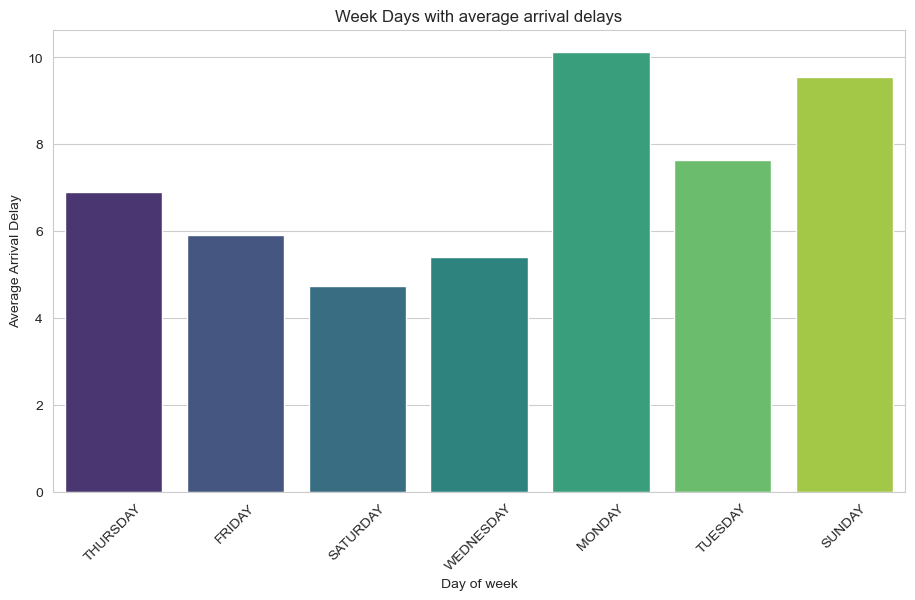

In [9]:
week_delays = collection.aggregate([
    {'$group': {'_id':'$DAY_OF_WEEK', 'avgDelay': {'$avg':'$ARRIVAL_DELAY'}}},
    {'$project': {'_id':0 ,'DAY_OF_WEEK':'$_id','avgDelay' :{'$round': ['$avgDelay',2]}}},
    {'$sort':{'_id':1}}
])

week_df = pd.DataFrame(list(week_delays))
week_df['_id'] = week_df['DAY_OF_WEEK'].apply(lambda x:'MONDAY' if x == 1 
                                         else 'TUESDAY' if x == 2 
                                         else 'WEDNESDAY' if x == 3 
                                         else 'THURSDAY' if x==4 
                                         else 'FRIDAY' if x==5 
                                         else 'SATURDAY' if x==6 
                                         else 'SUNDAY')
plt.figure(figsize=(11, 6))
sns.set_style('whitegrid')
sns.barplot(data=week_df, x='_id', y='avgDelay', palette='viridis')
plt.xlabel('Day of week')
plt.ylabel('Average Arrival Delay')
plt.title('Week Days with average arrival delays')
plt.xticks(rotation=45)
plt.show()

#### K. Arrange Days of month as per cancellations done in descending order.  [Create a suitable plot using matplotlib/seaborn]

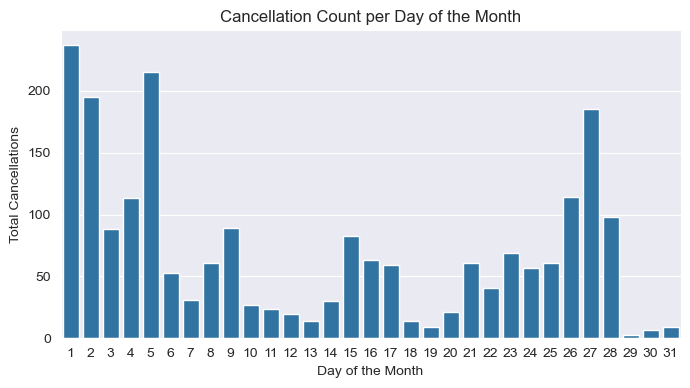

In [144]:
result = list(collection.aggregate([
    {
        "$match": {
            "CANCELLED": 1  # 1 means cancelled
        }
    },
    {
        "$group": {
            "_id": "$DAY",
            "cancellationCount": { "$sum": 1 }
        }
    },
    {
        '$project' :{
            "_id":0,
            "DAY":"$_id",
            "cancellationCount":1
        }
    },
    {
        "$sort": { "cancellationCount": -1 }
    }
]))

df = pd.DataFrame(result)
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(data=df, x='DAY', y='cancellationCount')
plt.xlabel('Day of the Month')
plt.ylabel('Total Cancellations')
plt.title('Cancellation Count per Day of the Month')
# plt.xticks(rotation=45)
plt.show()

#### L. Find the busiest airports with respect to day of week. Represent it by using suitable plot. 


In [146]:
# results = list(collection.aggregate([
#     {
#         "$group": {
#             "_id": {
#                 "day_of_week": "$DAY_OF_WEEK",
#                 "origin_airport": "$ORIGIN_AIRPORT"
#             },
#             "flight_count": {"$sum": 1}
#         }
#     },
# {
#         "$sort": {
#             "_id.day_of_week": 1,
#             "flight_count": -1
#         }
#     }
# ]))
# results

results = list(collection.aggregate([
    {
        "$group": {
            "_id": {
                "Origin_airport": "$ORIGIN_AIRPORT",
                "Destination_airport": "$DESTINATION_AIRPORT",
                "Day": "$DAY_OF_WEEK",
            },
            "count":{
                "$sum":1
            }
        }},
    {"$project":{
        "_id":0,
        "Origin_airport":"$_id.Origin_airport",
        "Destination_airport":"$_id.Destination_airport",
        "Day":"$_id.Day",
        "count":1
    }},
    {"$sort":{
        "Day":1,
        "count":-1
    }},
    {"$group":{
        "_id":{
            "Origin_Airport":{
                "$first": "$Origin_Airport"
            },
            "Destination_Airport":{
                "$first": "$Destination_Airport"
            },
            "Flight_count":{
                "$first": "$count"
            }
        }
    }
    }
    {"$project":{
        "_id":0,
        "Origin_airport":1,
        "Destination_airport":1,
        "Day":1,
        "count":1
}
    },
      {'$sort': {'Day': 1}}
]))

               
results

# df = pd.DataFrame(results)

# plt.figure(figsize=(8, 5))
# ax = sns.barplot(data=df, x="day_of_week", y="flight_count", hue="origin_airport", dodge=True)

# # Enhance the plot
# ax.set_title("Busiest Airports by Day of the Week")
# ax.set_xlabel("Day of the Week")
# ax.set_ylabel("Number of Flights")
# ax.legend(title="Origin Airport")

# # Show plot
# plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (882051807.py, line 43)

#### M. Find top 10 Airlines of US. Represent it by using suitable plot.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3024\4017298640.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='AIRLINE', y='flight_count', palette='crest')


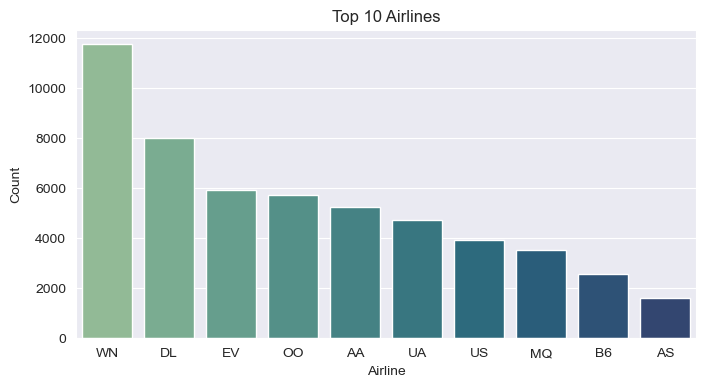

In [148]:
results =list(collection.aggregate([
    {
        "$group": {
            "_id": "$AIRLINE",
            "flight_count": {"$sum": 1}
        }
    },
    {
        "$sort": {
            "flight_count": -1
        }
    },
    {
        "$project": {
            "_id":0,
            "AIRLINE":"$_id",
            "flight_count":1
        }
    },
    {
        "$limit": 10
    }
]))

df = pd.DataFrame(results)
plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.barplot(data=df, x='AIRLINE', y='flight_count', palette='crest')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Top 10 Airlines')
plt.show()

#### N. Finding airlines that make the maximum, minimum number of cancellations.

In [184]:
results = list(collection.aggregate([
    {
        "$match": {"CANCELLED": 1}
    },
    {
        "$group": {
            "_id": "$AIRLINE",
            "cancellation_count": {"$sum": 1}
        }
    },
    {
        "$facet": {
            "max_cancellations": [
                {"$sort": {"cancellation_count": -1}},
                {"$limit": 1}
            ],
            "min_cancellations": [
                {"$sort": {"cancellation_count": 1}},
                {"$limit": 1}
            ]
        }
    }
]))

results

[{'max_cancellations': [{'_id': 'MQ', 'cancellation_count': 414}],
  'min_cancellations': [{'_id': 'HA', 'cancellation_count': 3}]}]

#### O. Find and show airlines names in descending that make the most number of diversions made. [Create a suitable plot using matplotlib/seaborn]

In [67]:
results = list(collection.aggregate([
    {
        "$match": {"DIVERTED": 1}
    },
    {
        "$group": {
            "_id": "$AIRLINE",
            "diversion_count": {"$sum": 1}
        }
    },
    {
        "$sort": {"diversion_count": -1}
    }
]))

results

[{'_id': 'WN', 'diversion_count': 35},
 {'_id': 'OO', 'diversion_count': 25},
 {'_id': 'EV', 'diversion_count': 22},
 {'_id': 'DL', 'diversion_count': 18},
 {'_id': 'B6', 'diversion_count': 16},
 {'_id': 'AA', 'diversion_count': 12},
 {'_id': 'US', 'diversion_count': 9},
 {'_id': 'UA', 'diversion_count': 8},
 {'_id': 'MQ', 'diversion_count': 5},
 {'_id': 'HA', 'diversion_count': 1}]

Text(0, 0.5, 'No of Diversions')

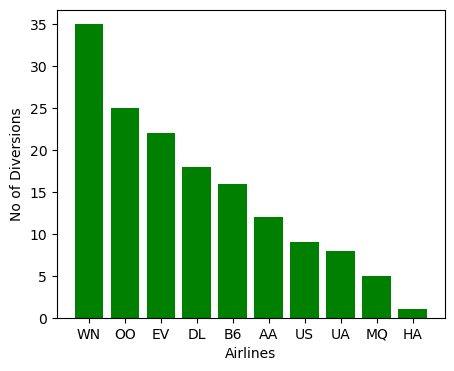

In [71]:
df = pd.DataFrame(results)
plt.figure(figsize=(5,4))
plt.bar(df['_id'],df['diversion_count'], color='green')
plt.xlabel("Airlines")
plt.ylabel("No of Diversions")

#### P. Finding days of month that see the most number of diversion and delays.

In [193]:
results = list(collection.aggregate([
    {
        "$group": {
            "_id": {
                "day": "$DAY",
                "month": "$MONTH",
                "year": "$YEAR"
            },
            "diversion_count": {
                "$sum": {
                    "$cond": [{ "$eq": ["$DIVERTED", 1] }, 1, 0]
                }
            },
            "delay_count": {
                "$sum": {
                    "$cond": [{ "$gt": ["$DEPARTURE_DELAY", 0] }, 1, 0]
                }
            }
        }
    },
    {
        "$sort": {
            "diversion_count": -1
        }
    },
    {
        "$facet": {
            "top_diversions": [
                {"$sort": {"diversion_count": -1}},
                {"$limit": 10}
            ],
            "top_delays": [
                {"$sort": {"delay_count": -1}},
                {"$limit": 10}
            ]
        }
    }
]))
results

[{'top_diversions': [{'_id': {'day': 2, 'month': 2, 'year': 2015},
    'diversion_count': 9,
    'delay_count': 338},
   {'_id': {'day': 1, 'month': 3, 'year': 2015},
    'diversion_count': 7,
    'delay_count': 426},
   {'_id': {'day': 14, 'month': 2, 'year': 2015},
    'diversion_count': 7,
    'delay_count': 227},
   {'_id': {'day': 5, 'month': 3, 'year': 2015},
    'diversion_count': 7,
    'delay_count': 360},
   {'_id': {'day': 2, 'month': 3, 'year': 2015},
    'diversion_count': 6,
    'delay_count': 495},
   {'_id': {'day': 4, 'month': 3, 'year': 2015},
    'diversion_count': 6,
    'delay_count': 377},
   {'_id': {'day': 18, 'month': 1, 'year': 2015},
    'diversion_count': 5,
    'delay_count': 227},
   {'_id': {'day': 23, 'month': 2, 'year': 2015},
    'diversion_count': 5,
    'delay_count': 354},
   {'_id': {'day': 7, 'month': 1, 'year': 2015},
    'diversion_count': 5,
    'delay_count': 403},
   {'_id': {'day': 11, 'month': 1, 'year': 2015},
    'diversion_count': 5,
   

#### Q. Write a MongoDB query to find the flights with the shortest and longest AIR_TIME. Return the flightNumber, airline, and AIR_TIME.

In [16]:
results = list(collection.aggregate([
    {'$facet':{
        'longest_time': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':-1}},
            {'$limit': 1}
        ],
        'shortest_time': [
            {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE':1,'AIR_TIME':1}},
            {'$sort': {'AIR_TIME':1}},
            {'$limit': 1}
        ],
    }}
]))
results

[{'longest_time': [{'AIRLINE': 'UA', 'FLIGHT_NUMBER': 15, 'AIR_TIME': 654.0}],
  'shortest_time': [{'AIRLINE': 'EV',
    'FLIGHT_NUMBER': 6172,
    'AIR_TIME': 0.0}]}]

#### R. Finding all diverted Route from a source to destination Airport & which route is the most diverted route.

In [18]:
result = list(collection.aggregate([
    {"$match": {"DIVERTED": 1}},
    {"$group": {
         "_id": {
             "origin": "$ORIGIN_AIRPORT", 
             "destination": "$DESTINATION_AIRPORT"
         },
        "total_diversions": {"$sum": 1}
    }},
    {"$project": {
        "_id": 0,
        "origin": "$_id.origin",
        "destination": "$_id.destination",
        "total_diversions": 1
    }},
    {"$sort": {
        "total_diversions": -1
    }},
    {
        "$limit": 1
    }
    
]))

result

[{'total_diversions': 2, 'origin': 'STT', 'destination': 'PHL'}]

#### S. Write a MongoDB aggregation pipeline to calculate the all aggregated values for departure delay (DEPARTURE_DELAY) and arrival delay (ARRIVAL_DELAY) for each airline, excluding flights that were either cancelled or diverted.

In [21]:
result = list(collection.aggregate([
    {"$match": {
        "DIVERTED": 0,
        "CANCELLED": 0
    }},
    {"$group":{
        "_id": "$AIRLINE",
        "total_departure_delay": {"$sum": "$DEPARTURE_DELAY"}, 
        "total_arrival_delay": {"$sum": "$ARRIVAL_DELAY"},     
        "average_departure_delay": {"$avg": "$DEPARTURE_DELAY"},
        "average_arrival_delay": {"$avg": "$ARRIVAL_DELAY"},     
        "max_departure_delay": {"$max": "$DEPARTURE_DELAY"},
        "max_arrival_delay": {"$max": "$ARRIVAL_DELAY"},    
        "min_departure_delay": {"$min": "$DEPARTURE_DELAY"},
        "min_arrival_delay": {"$min": "$ARRIVAL_DELAY"} 
    }},
]))

result

[{'_id': 'HA',
  'total_departure_delay': 855.0,
  'total_arrival_delay': 2924.0,
  'average_departure_delay': 1.190807799442897,
  'average_arrival_delay': 4.072423398328691,
  'max_departure_delay': 715.0,
  'max_arrival_delay': 736.0,
  'min_departure_delay': -17.0,
  'min_arrival_delay': -52.0},
 {'_id': 'UA',
  'total_departure_delay': 64760.0,
  'total_arrival_delay': 30613.0,
  'average_departure_delay': 14.167578210457231,
  'average_arrival_delay': 6.697221614526362,
  'max_departure_delay': 473.0,
  'max_arrival_delay': 470.0,
  'min_departure_delay': -23.0,
  'min_arrival_delay': -56.0},
 {'_id': 'EV',
  'total_departure_delay': 63771.0,
  'total_arrival_delay': 60756.0,
  'average_departure_delay': 11.424399856682193,
  'average_arrival_delay': 10.884270870655678,
  'max_departure_delay': 526.0,
  'max_arrival_delay': 571.0,
  'min_departure_delay': -24.0,
  'min_arrival_delay': -50.0},
 {'_id': 'MQ',
  'total_departure_delay': 51679.0,
  'total_arrival_delay': 59291.0,
  '

#### T. Write a MongoDB query to find all flights that were delayed due to WEATHER_DELAY but were not cancelled or diverted. Include the flightNumber, airline, originAirport, and destinationAirport in the results.

In [23]:
result = list(collection.aggregate([
    {"$match": {
        "WEATHER_DELAY": {"$gt": 0.0},
        "DIVERTED": 0,
        "CANCELLED": 0
    }},
    {'$project': {'_id': 0,'FLIGHT_NUMBER': 1,'AIRLINE': 1,'DESTINATION_AIRPORT':1,'ORIGIN_AIRPORT':1, 'WEATHER_DELAY': 1}}
]))

result

[{'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 532,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'DCA',
  'WEATHER_DELAY': 10.0},
 {'AIRLINE': 'US',
  'FLIGHT_NUMBER': 1784,
  'ORIGIN_AIRPORT': 'BWI',
  'DESTINATION_AIRPORT': 'PHX',
  'WEATHER_DELAY': 56.0},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3019,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'OKC',
  'WEATHER_DELAY': 15.0},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3564,
  'ORIGIN_AIRPORT': 'GSO',
  'DESTINATION_AIRPORT': 'LGA',
  'WEATHER_DELAY': 104.0},
 {'AIRLINE': 'UA',
  'FLIGHT_NUMBER': 1667,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': 'PDX',
  'WEATHER_DELAY': 99.0},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 1788,
  'ORIGIN_AIRPORT': 'ATL',
  'DESTINATION_AIRPORT': 'MEM',
  'WEATHER_DELAY': 163.0},
 {'AIRLINE': 'DL',
  'FLIGHT_NUMBER': 424,
  'ORIGIN_AIRPORT': 'JFK',
  'DESTINATION_AIRPORT': 'LAX',
  'WEATHER_DELAY': 39.0},
 {'AIRLINE': 'MQ',
  'FLIGHT_NUMBER': 3201,
  'ORIGIN_AIRPORT': 'ORD',
  'DESTINATION_AIRPORT': '

#### U. Write a MongoDB query to find all flights that were delayed both at departure (DEPARTURE_DELAY) and arrival (ARRIVAL_DELAY). Return the count of such Flights which are delayed.

In [27]:
result = list(collection.aggregate([
    {"$match": {
        "ARRIVAL_DELAY": {"$gt": 0.0},
        "DEPARTURE_DELAY": {"$gt": 0.0},
        
    }},
    {'$group': {
        "_id": "null",
        "delay_count": {"$sum": 1}
    }},
]))

result

[{'_id': 'null', 'delay_count': 16481}]

#### V. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined time intervals (e.g., every hour) throughout the day. Generate a Suitable Plot.

In [112]:
result1 = list(collection.aggregate([{'$project': {'hour': { '$floor': { '$divide': ['$SCHEDULED_DEPARTURE', 100]}}}},
    {'$group': {'_id': '$hour','takeoff_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result1

[{'_id': 0.0, 'takeoff_count': 92},
 {'_id': 1.0, 'takeoff_count': 52},
 {'_id': 2.0, 'takeoff_count': 16},
 {'_id': 3.0, 'takeoff_count': 8},
 {'_id': 4.0, 'takeoff_count': 12},
 {'_id': 5.0, 'takeoff_count': 730},
 {'_id': 6.0, 'takeoff_count': 4010},
 {'_id': 7.0, 'takeoff_count': 3699},
 {'_id': 8.0, 'takeoff_count': 3962},
 {'_id': 9.0, 'takeoff_count': 3519},
 {'_id': 10.0, 'takeoff_count': 3583},
 {'_id': 11.0, 'takeoff_count': 3639},
 {'_id': 12.0, 'takeoff_count': 3297},
 {'_id': 13.0, 'takeoff_count': 3776},
 {'_id': 14.0, 'takeoff_count': 3320},
 {'_id': 15.0, 'takeoff_count': 3439},
 {'_id': 16.0, 'takeoff_count': 3340},
 {'_id': 17.0, 'takeoff_count': 3919},
 {'_id': 18.0, 'takeoff_count': 3279},
 {'_id': 19.0, 'takeoff_count': 3180},
 {'_id': 20.0, 'takeoff_count': 2399},
 {'_id': 21.0, 'takeoff_count': 1643},
 {'_id': 22.0, 'takeoff_count': 722},
 {'_id': 23.0, 'takeoff_count': 364}]

In [110]:
result2 = list(db.flights.aggregate([{'$project': {'hour': { '$floor': { '$divide': ['$ARRIVAL_TIME', 100]}}}},
    {'$group': {'_id': '$hour','landing_count': { '$sum': 1 }}},
    {'$sort': { '_id': 1 }}]))
result2

[{'_id': 0.0, 'landing_count': 2943},
 {'_id': 1.0, 'landing_count': 217},
 {'_id': 2.0, 'landing_count': 76},
 {'_id': 3.0, 'landing_count': 41},
 {'_id': 4.0, 'landing_count': 83},
 {'_id': 5.0, 'landing_count': 314},
 {'_id': 6.0, 'landing_count': 636},
 {'_id': 7.0, 'landing_count': 1682},
 {'_id': 8.0, 'landing_count': 2458},
 {'_id': 9.0, 'landing_count': 3041},
 {'_id': 10.0, 'landing_count': 3311},
 {'_id': 11.0, 'landing_count': 3177},
 {'_id': 12.0, 'landing_count': 3344},
 {'_id': 13.0, 'landing_count': 3221},
 {'_id': 14.0, 'landing_count': 3399},
 {'_id': 15.0, 'landing_count': 3355},
 {'_id': 16.0, 'landing_count': 3630},
 {'_id': 17.0, 'landing_count': 3124},
 {'_id': 18.0, 'landing_count': 3419},
 {'_id': 19.0, 'landing_count': 3325},
 {'_id': 20.0, 'landing_count': 3442},
 {'_id': 21.0, 'landing_count': 3154},
 {'_id': 22.0, 'landing_count': 2644},
 {'_id': 23.0, 'landing_count': 1946},
 {'_id': 24.0, 'landing_count': 18}]

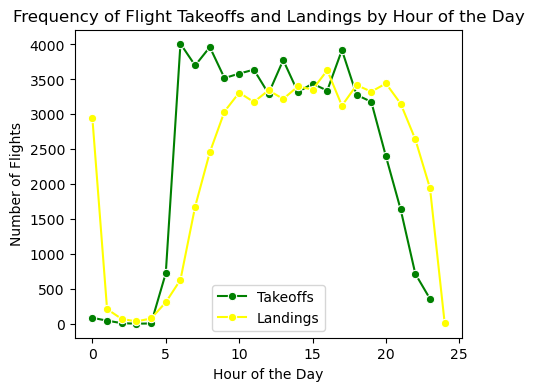

In [114]:
df_takeoff = pd.DataFrame(result1)
df_landing = pd.DataFrame(result2)
df_takeoff.columns = ['Hour', 'Takeoffs']
df_landing.columns = ['Hour', 'Landings']
plt.figure(figsize=(5, 4))
sns.lineplot(data=df_takeoff, x='Hour', y='Takeoffs', label='Takeoffs', marker='o', color='green')
sns.lineplot(data=df_landing, x='Hour', y='Landings', label='Landings', marker='o', color='yellow')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Flights')
plt.title('Frequency of Flight Takeoffs and Landings by Hour of the Day')
plt.show()

In [25]:
# result = list(collection.aggregate([
#     {"$project": {
#         "departure_hour": {"$floor": {"$divide": ["$SCHEDULED_DEPARTURE", 100]}},
#         "arrival_hour": {"$floor": {"$divide": ["$SCHEDULED_ARRIVAL", 100]}},
#     }},
    
#     {"$facet": {
#         "takeoffs": [
#             {"$group": {
#                 "_id": "$departure_hour",
#                 "count": {"$sum": 1}
#             }},
#             {"$sort": {"_id": 1}}
#         ],
#         "landings": [
#             {"$group": {
#                 "_id": "$arrival_hour",
#                 "count": {"$sum": 1}
#             }},
#             {"$sort": {"_id": 1}}
#         ]
#     }}
# ]))

# result

# # takeoffs_df = pd.DataFrame(result[0]['takeoffs'])
# # landings_df = pd.DataFrame(result[0]['landings'])
# # takeoffs_df = takeoffs_df.rename(columns={"_id": "hour", "count": "takeoff_count"})
# # landings_df = landings_df.rename(columns={"_id": "hour", "count": "landing_count"})

# # combined_df = pd.merge(takeoffs_df, landings_df, on="hour", how="inner")
# # df_melted = combined_df.melt(id_vars='hour', value_vars=['takeoff_count', 'landing_count'], var_name='Flight Type', value_name='Count',)

# # plt.figure(figsize=(10, 6))
# # sns.barplot(x='hour', y='Count', hue='Flight Type', data=df_melted, palette={'takeoff_count': 'blue', 'landing_count': 'green'})

# # plt.xlabel('Hour')
# # plt.ylabel('Count')
# # plt.title('Total Takeoff and Landing Count in Each Hour of Day')
# # plt.legend(title='Flight Type')
# # plt.show()

# takeoff_data = result[0]['takeoffs']
# landing_data = result[0]['landings']

# # Convert data into lists for plotting
# hours = [entry['_id'] for entry in takeoff_data]
# takeoff_counts = [entry['count'] for entry in takeoff_data]
# landing_counts = [entry['count'] for entry in landing_data]

# # Ensure that both takeoffs and landings have the same set of hours
# hours_set = set(hours)
# takeoff_counts_dict = dict(zip(hours, takeoff_counts))
# landing_counts_dict = dict(zip(hours, landing_counts))

# # Prepare counts for all hours
# all_hours = sorted(hours_set)
# takeoff_counts_all = [takeoff_counts_dict.get(hour, 0) for hour in all_hours]
# landing_counts_all = [landing_counts_dict.get(hour, 0) for hour in all_hours]

# # Set bar width and positions
# bar_width = 0.4
# index = np.arange(len(all_hours))

# # Create the plot
# plt.figure(figsize=(14, 7))

# plt.bar(index - bar_width/2, takeoff_counts_all, bar_width, label='Takeoffs', color='blue', alpha=0.7)
# plt.bar(index + bar_width/2, landing_counts_all, bar_width, label='Landings', color='green', alpha=0.7)

# plt.xlabel('Hour of the Day')
# plt.ylabel('Number of Flights')
# plt.title('Takeoffs and Landings by Hour of the Day')
# plt.xticks(index, all_hours)
# plt.legend()
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Show the plot
# plt.tight_layout()
# plt.show()

#### W. Write a MongoDB query to calculate the frequency of flight takeoffs and landings within defined week of day. Generate a Suitable Plot.

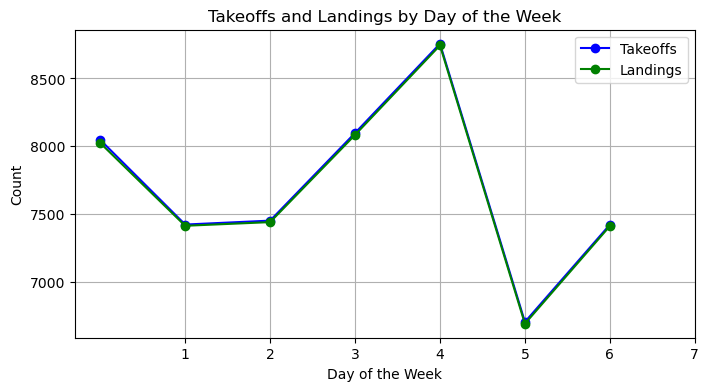

In [39]:
result = list(collection.aggregate([
    {"$project": {
            "day_of_week": "$DAY_OF_WEEK",
            "is_takeoff": { "$cond": [{ "$gt": ["$DEPARTURE_TIME", 0.0] }, 1, 0] },
            "is_landing": { "$cond": [{ "$gt": ["$ARRIVAL_TIME", 0.0] }, 1, 0] }
        }
    },
    {"$group": {
            "_id": "$day_of_week",
            "takeoff_count": { "$sum": "$is_takeoff" },
            "landing_count": { "$sum": "$is_landing" }
        }
    },
    {"$project": {
            "day_of_week": "$_id",
            "takeoff_count": 1,
            "landing_count": 1,
            "_id": 0
        }
    },
    {"$sort": { "day_of_week": 1 }}
]))

# result
# df = pd.DataFrame(result)
# df_melted = df.melt(id_vars='day_of_week', value_vars=['takeoff_count', 'landing_count'], var_name='Flight Type', value_name='Count',)

# plt.figure(figsize=(10, 6))
# sns.barplot(x='day_of_week', y='Count', hue='Flight Type', data=df_melted, palette={'takeoff_count': 'blue', 'landing_count': 'green'})

# plt.xlabel('Day of Week')
# plt.ylabel('Count')
# plt.title('Total Takeoff and Landing Count by Day of the Week')
# plt.legend(title='Flight Type')
# plt.show()

# days_of_week = [entry['day_of_week'] for entry in result]
takeoff_counts = [entry['takeoff_count'] for entry in result]
landing_counts = [entry['landing_count'] for entry in result]


plt.figure(figsize=(8, 4))

plt.plot( takeoff_counts, marker='o', linestyle='-', color='blue', label='Takeoffs')
plt.plot( landing_counts, marker='o', linestyle='-', color='green', label='Landings')

plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Takeoffs and Landings by Day of the Week')
plt.xticks(days_of_week)
plt.legend()
plt.grid(True)


plt.show()

#### X. Write a MongoDB query to find all flights that departed between 6 AM and 12 PM (noon) local time, regardless of the date. Return the flightNumber, airline, and departureTime. Generate a Bar Plot using Time (x-axis) and Frequency (y-axis).


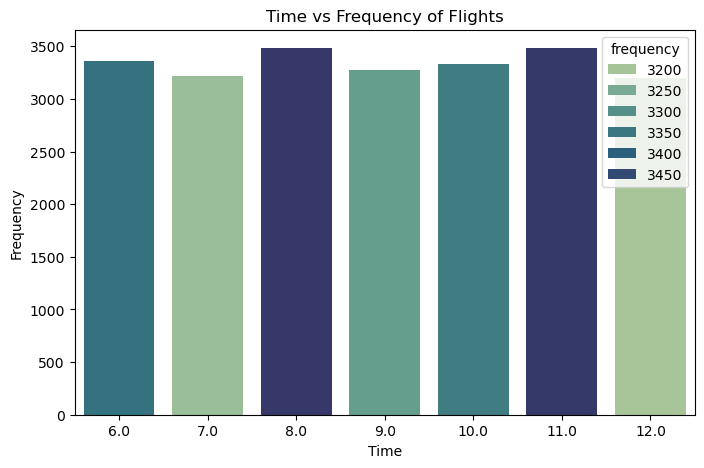

In [55]:
result = list(collection.aggregate([
    {"$project":{
        "departure_time": {"$floor": {"$divide": ["$DEPARTURE_TIME", 100]}},
        "FLIGHT_NUMBER": 1,
        "AIRLINE": 1,
    }},
    {"$match": {"departure_time":  {"$gte": 6, "$lte": 12} }},
    {"$group": {
        "_id": "$departure_time",
        "frequency": {"$sum": 1}
    }}
]))
result
df = pd.DataFrame(result)
plt.figure(figsize=(8, 5))
sns.barplot(x="_id", y="frequency", data=df, hue="frequency", palette="crest")
plt.title("Time vs Frequency of Flights")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

#### y. When is the best time of day/day of week/time of a year to fly with minimum delays?

In [49]:
# Best Day
list(collection.aggregate([
    {"$project": {
        "day": "$DAY",
        "departure_delay": "$DEPARTURE_DELAY",
        "arrival_delay": "$ARRIVAL_DELAY"
    }},
    {"$group": {
        "_id": "$day",
        "average_delay": {"$avg": {'$add': ['$arrival_delay','$departure_delay']}}
    }},
    {"$sort": {"average_delay": 1}}
]))

[{'_id': 31, 'average_delay': 4.09726443768997},
 {'_id': 10, 'average_delay': 4.924986210700497},
 {'_id': 29, 'average_delay': 4.960336538461538},
 {'_id': 14, 'average_delay': 6.968832891246684},
 {'_id': 19, 'average_delay': 8.237001209189843},
 {'_id': 15, 'average_delay': 9.869592088998765},
 {'_id': 28, 'average_delay': 10.976253298153035},
 {'_id': 7, 'average_delay': 11.03881782090869},
 {'_id': 18, 'average_delay': 11.065544197233915},
 {'_id': 13, 'average_delay': 11.15324384787472},
 {'_id': 23, 'average_delay': 11.393107476635514},
 {'_id': 27, 'average_delay': 12.0119189511323},
 {'_id': 30, 'average_delay': 12.082663605051664},
 {'_id': 20, 'average_delay': 12.106470588235295},
 {'_id': 11, 'average_delay': 12.392180818570555},
 {'_id': 9, 'average_delay': 13.225190839694656},
 {'_id': 25, 'average_delay': 13.33270794246404},
 {'_id': 21, 'average_delay': 14.992666666666667},
 {'_id': 8, 'average_delay': 15.196837286724927},
 {'_id': 24, 'average_delay': 15.4608636977058

In [43]:
# Day of Week
list(collection.aggregate([
    {"$project": {
        "day": "$DAY_OF_WEEK",
        "departure_delay": "$DEPARTURE_DELAY",
        "arrival_delay": "$ARRIVAL_DELAY"
    }},
    {"$group": {
        "_id": "$day",
        "average_delay": {"$avg": {'$add': ['$arrival_delay','$departure_delay']}}
    }},
    {"$sort": {"average_delay": 1}}
]))

[{'_id': 6, 'average_delay': 14.154561301568855},
 {'_id': 3, 'average_delay': 14.233472149921916},
 {'_id': 5, 'average_delay': 15.901192887688499},
 {'_id': 4, 'average_delay': 17.397617629541394},
 {'_id': 2, 'average_delay': 18.47514450867052},
 {'_id': 7, 'average_delay': 22.593458540948},
 {'_id': 1, 'average_delay': 23.541281180466097}]

In [45]:
# Best Month
list(collection.aggregate([
    {"$project": {
        "day": "$MONTH",
        "departure_delay": "$DEPARTURE_DELAY",
        "arrival_delay": "$ARRIVAL_DELAY"
    }},
    {"$group": {
        "_id": "$day",
        "average_delay": {"$avg": {'$add': ['$arrival_delay','$departure_delay']}}
    }},
    {"$sort": {"average_delay": 1}}
]))

[{'_id': 1, 'average_delay': 15.223467922119374},
 {'_id': 2, 'average_delay': 19.047392745029647},
 {'_id': 3, 'average_delay': 24.677}]